In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data= pd.read_excel('Chapter6_Frac_Stage_Data.xlsx')

In [3]:
data.describe()

Time    SLUR RATE     PROP CON     TR PRESS
count  4600.000000  4600.000000  4600.000000  4600.000000
mean   2300.500000    97.079174     1.233283  9032.118696
std    1328.049949     7.149957     0.693707   127.579547
min       1.000000    48.700000     0.000000  8058.000000
25%    1150.750000    96.800000     0.700000  8940.000000
50%    2300.500000    99.600000     1.000000  9055.000000
75%    3450.250000    99.800000     1.800000  9141.000000
max    4600.000000   100.300000     2.500000  9268.000000

In [4]:
data.head()

Time  SLUR RATE  PROP CON  TR PRESS
0     1       49.4       0.0      8560
1     2       50.1       0.0      8537
2     3       50.1       0.0      8534
3     4       49.3       0.0      8617
4     5       49.2       0.0      8646

In [5]:
data.tail()

Time  SLUR RATE  PROP CON  TR PRESS
4595  4596       99.1       1.0      9194
4596  4597       99.0       1.0      9201
4597  4598       99.0       1.0      9184
4598  4599       99.3       1.0      9178
4599  4600       99.0       1.0      9188

Text(0, 0.5, 'Slurry Rate (bpm))')

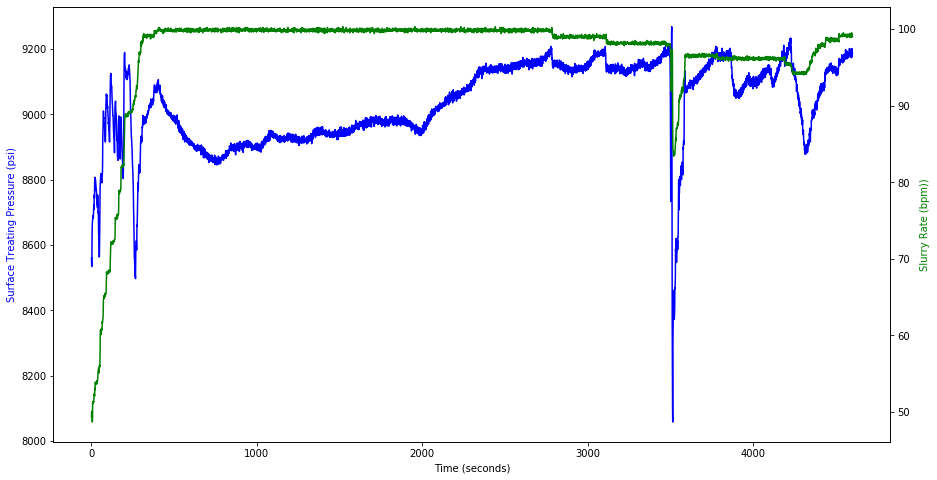

<Figure size 1080x576 with 0 Axes>

In [6]:
fig, ax1 = plt.subplots(figsize=(15,8))
plt.figure(figsize=(15,8))
ax2 = ax1.twinx()

ax1.plot(data['Time'], data['TR PRESS'], 'b')
ax2.plot(data['Time'], data['SLUR RATE'], 'g')


ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Surface Treating Pressure (psi)', color='b')
ax2.set_ylabel('Slurry Rate (bpm))', color='g')


In [7]:
start_time = 1
end_time = 4500

In [8]:
filter = (data['Time'] > start_time) & (data['Time'] <= end_time)

In [9]:
data_training = data.loc[filter].copy()
data_training.tail()

Time  SLUR RATE  PROP CON  TR PRESS
4495  4496       98.7       1.0      9127
4496  4497       98.8       1.0      9125
4497  4498       98.5       1.0      9131
4498  4499       98.4       1.0      9136
4499  4500       98.6       1.0      9145

In [10]:
start_time2 = 4500
end_time2 = 4600

In [11]:
filter2 = (data['Time'] > start_time2) & (data['Time'] <= end_time2)

In [12]:
data_testing = data.loc[filter2].copy()
data_testing.tail()

Time  SLUR RATE  PROP CON  TR PRESS
4595  4596       99.1       1.0      9194
4596  4597       99.0       1.0      9201
4597  4598       99.0       1.0      9184
4598  4599       99.3       1.0      9178
4599  4600       99.0       1.0      9188

In [13]:
data_testing.head()

Time  SLUR RATE  PROP CON  TR PRESS
4500  4501       98.4       1.0      9120
4501  4502       98.6       1.0      9133
4502  4503       98.7       1.0      9131
4503  4504       98.6       1.0      9125
4504  4505       98.6       1.0      9118

In [14]:
training_data= data_training.drop(['Time'], axis=1)
training_data.head()

SLUR RATE  PROP CON  TR PRESS
1       50.1       0.0      8537
2       50.1       0.0      8534
3       49.3       0.0      8617
4       49.2       0.0      8646
5       48.7       0.0      8667

In [15]:
scaler=MinMaxScaler()
training_data= scaler.fit_transform(training_data)
training_data

array([[0.02713178, 0.        , 0.39586777],
       [0.02713178, 0.        , 0.39338843],
       [0.01162791, 0.        , 0.46198347],
       ...,
       [0.96511628, 0.4       , 0.88677686],
       [0.96317829, 0.4       , 0.89090909],
       [0.96705426, 0.4       , 0.89834711]])

In [16]:
X_train= []
y_train= []

In [17]:
for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [18]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train.shape, y_train.shape

((4439, 60, 3), (4439,))

# Building LSTM

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [21]:
import tensorflow as tf
import random as python_random

def reset_seeds():
    np.random.seed(100) 
    python_random.seed(100)
    tf.random.set_seed(100)

reset_seeds() 

Frac_LSTM = Sequential()

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],3)))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(LSTM(units=200, activation='relu', return_sequences=True))
Frac_LSTM.add(Dropout(0.3))


Frac_LSTM.add(LSTM(units=200, activation='relu'))
Frac_LSTM.add(Dropout(0.3))

Frac_LSTM.add(Dense(units=1))

In [22]:
Frac_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 200)           163200    
_________________________________________________________________
dropout (Dropout)            (None, 60, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 200)           320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [23]:
Frac_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
history=Frac_LSTM.fit(X_train,y_train, epochs=100, batch_size=32, shuffle=True)

Train on 4439 samples
Epoch 1/100
4439/4439 [==============================] - 25s 6ms/sample - loss: 0.0605
Epoch 2/100
4439/4439 [==============================] - 26s 6ms/sample - loss: 0.0072
Epoch 3/100
4439/4439 [==============================] - 31s 7ms/sample - loss: 0.0065
Epoch 4/100
4439/4439 [==============================] - 33s 7ms/sample - loss: 0.0059
Epoch 5/100
4439/4439 [==============================] - 33s 7ms/sample - loss: 0.0058
Epoch 6/100
4439/4439 [==============================] - 34s 8ms/sample - loss: 0.0053
Epoch 7/100
4439/4439 [==============================] - 36s 8ms/sample - loss: 0.0051
Epoch 8/100
4439/4439 [==============================] - 37s 8ms/sample - loss: 0.0049
Epoch 9/100
4439/4439 [==============================] - 40s 9ms/sample - loss: 0.0046
Epoch 10/100
4439/4439 [==============================] - 41s 9ms/sample - loss: 0.0042
Epoch 11/100
4439/4439 [==============================] - 47s 11ms/sample - loss: 0.0043
Epoch 12/100
4439/

4439/4439 [==============================] - 39s 9ms/sample - loss: 1.8662e-04
Epoch 92/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 2.1588e-04
Epoch 93/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 2.0377e-04
Epoch 94/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 1.9440e-04
Epoch 95/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 2.8725e-04
Epoch 96/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 2.2165e-04
Epoch 97/100
4439/4439 [==============================] - 38s 9ms/sample - loss: 2.3116e-04
Epoch 98/100
4439/4439 [==============================] - 39s 9ms/sample - loss: 2.0920e-04
Epoch 99/100
4439/4439 [==============================] - 38s 9ms/sample - loss: 1.9204e-04
Epoch 100/100
4439/4439 [==============================] - 38s 8ms/sample - loss: 1.5980e-04


In [25]:
# Preparing Test Data set

In [26]:
data_testing.head()

Time  SLUR RATE  PROP CON  TR PRESS
4500  4501       98.4       1.0      9120
4501  4502       98.6       1.0      9133
4502  4503       98.7       1.0      9131
4503  4504       98.6       1.0      9125
4504  4505       98.6       1.0      9118

In [27]:
data_training.head()

Time  SLUR RATE  PROP CON  TR PRESS
1     2       50.1       0.0      8537
2     3       50.1       0.0      8534
3     4       49.3       0.0      8617
4     5       49.2       0.0      8646
5     6       48.7       0.0      8667

In [28]:
past_60_secs= data_training.tail(60)


In [29]:
df=past_60_secs.append(data_testing,ignore_index=True)
df.head()

Time  SLUR RATE  PROP CON  TR PRESS
0  4441       98.6       1.0      9132
1  4442       98.7       1.0      9122
2  4443       98.6       1.0      9124
3  4444       98.8       1.0      9125
4  4445       98.8       1.0      9127

In [30]:
df=df.drop(['Time'], axis=1)
df.head()

SLUR RATE  PROP CON  TR PRESS
0       98.6       1.0      9132
1       98.7       1.0      9122
2       98.6       1.0      9124
3       98.8       1.0      9125
4       98.8       1.0      9127

In [31]:
df.describe()

SLUR RATE  PROP CON     TR PRESS
count  160.000000     160.0   160.000000
mean    98.878125       1.0  9156.781250
std      0.307899       0.0    22.452934
min     98.200000       1.0  9118.000000
25%     98.600000       1.0  9137.000000
50%     98.900000       1.0  9158.500000
75%     99.100000       1.0  9176.000000
max     99.500000       1.0  9201.000000

In [32]:
testing_inputs= scaler.transform(df)

In [33]:
testing_inputs

array([[0.96705426, 0.4       , 0.88760331],
       [0.96899225, 0.4       , 0.87933884],
       [0.96705426, 0.4       , 0.88099174],
       [0.97093023, 0.4       , 0.88181818],
       [0.97093023, 0.4       , 0.88347107],
       [0.97093023, 0.4       , 0.88347107],
       [0.96705426, 0.4       , 0.89669421],
       [0.97286822, 0.4       , 0.89173554],
       [0.96705426, 0.4       , 0.89173554],
       [0.96705426, 0.4       , 0.88512397],
       [0.96899225, 0.4       , 0.88347107],
       [0.96511628, 0.4       , 0.89173554],
       [0.96511628, 0.4       , 0.88677686],
       [0.96705426, 0.4       , 0.89752066],
       [0.97093023, 0.4       , 0.89338843],
       [0.96511628, 0.4       , 0.89173554],
       [0.96317829, 0.4       , 0.89752066],
       [0.96511628, 0.4       , 0.88677686],
       [0.96705426, 0.4       , 0.8892562 ],
       [0.96899225, 0.4       , 0.89256198],
       [0.96899225, 0.4       , 0.90247934],
       [0.96317829, 0.4       , 0.90578512],
       [0.

In [34]:
X_test=[]
y_test=[]

In [35]:
testing_inputs.shape[0]

160

In [36]:
for i in range(60,testing_inputs.shape[0]):
    X_test.append(testing_inputs[i-60:i])
    y_test.append(testing_inputs[i,0])

In [37]:
X_test, y_test= np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

# (samples, timestep, features)

((100, 60, 3), (100,))

In [38]:
y_pred=Frac_LSTM.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted TR PRESS'])
y_pred.head()

Predicted TR PRESS
0            0.964235
1            0.964230
2            0.964221
3            0.964215
4            0.964209

In [39]:
y_pred.describe()

Predicted TR PRESS
count          100.000000
mean             0.964922
std              0.000411
min              0.964168
25%              0.964638
50%              0.965096
75%              0.965229
max              0.965344

In [40]:
y_pred['Predicted TR PRESS']=y_pred['Predicted TR PRESS']*(data['TR PRESS'].max()-data['TR PRESS'].min())+(data['TR PRESS'].min())


In [41]:
y_test=pd.DataFrame(y_test,columns=['Actual TR PRESS'])
y_test['Actual TR PRESS']=y_test['Actual TR PRESS']*(data['TR PRESS'].max()-data['TR PRESS'].min())+(data['TR PRESS'].min())
y_test.head()

Actual TR PRESS
0      9223.445736
1      9228.135659
2      9230.480620
3      9228.135659
4      9228.135659

In [42]:
y_pred['Predicted TR PRESS'].head()

0    9224.724609
1    9224.717773
2    9224.707031
3    9224.700195
4    9224.692383
Name: Predicted TR PRESS, dtype: float32

In [43]:
# scaler.scale_

# Visualization

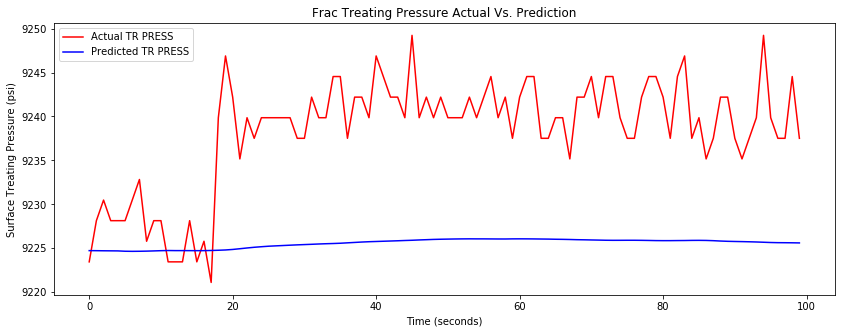

In [44]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Actual TR PRESS')
plt.plot(y_pred['Predicted TR PRESS'], color='blue', label='Predicted TR PRESS')
plt.title('Frac Treating Pressure Actual Vs. Prediction')
plt.xlabel('Time (seconds)')
plt.ylabel('Surface Treating Pressure (psi)')
plt.legend()